### Import Libraries

In [280]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
warnings.filterwarnings("ignore")

%matplotlib inline

<!--  -->

### Sample Data

In [291]:
x = tf.linspace(-2, 2, 150) # Generates a sequence of numbers linearly spaced between a specified start(-2) and stop(2) value
x = tf.cast(x, tf.float32)

print("Sample Data: Size", x.shape[0])
print("Sample Data: ", x)

Sample Data: Size 150
Sample Data:  tf.Tensor(
[-2.         -1.9731543  -1.9463087  -1.919463   -1.8926175  -1.8657718
 -1.8389262  -1.8120805  -1.7852349  -1.7583892  -1.7315437  -1.704698
 -1.6778524  -1.6510067  -1.6241611  -1.5973154  -1.5704699  -1.5436242
 -1.5167785  -1.4899329  -1.4630872  -1.4362416  -1.4093959  -1.3825504
 -1.3557047  -1.3288591  -1.3020134  -1.2751678  -1.2483221  -1.2214766
 -1.1946309  -1.1677853  -1.1409396  -1.114094   -1.0872483  -1.0604026
 -1.033557   -1.0067114  -0.9798658  -0.95302016 -0.9261745  -0.8993289
 -0.8724832  -0.84563756 -0.8187919  -0.7919463  -0.76510066 -0.738255
 -0.7114094  -0.68456376 -0.6577181  -0.6308725  -0.60402685 -0.5771812
 -0.5503356  -0.52348995 -0.4966443  -0.46979865 -0.44295302 -0.4161074
 -0.38926175 -0.36241612 -0.33557048 -0.30872482 -0.2818792  -0.25503355
 -0.22818792 -0.20134228 -0.17449665 -0.147651   -0.12080537 -0.09395973
 -0.06711409 -0.04026845 -0.01342282  0.01342282  0.04026845  0.06711409
  0.09395973  0.

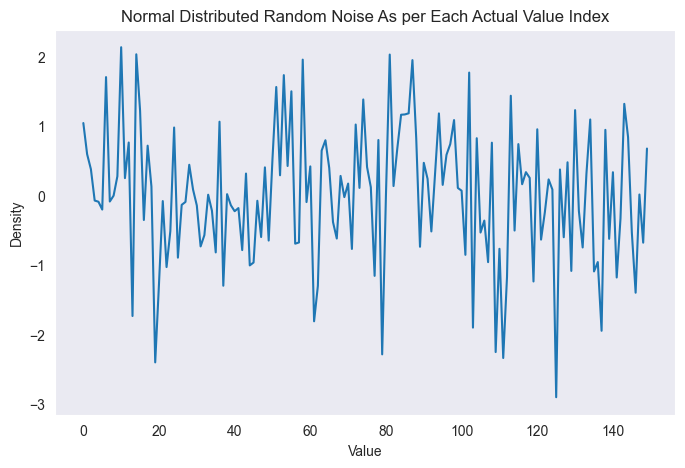

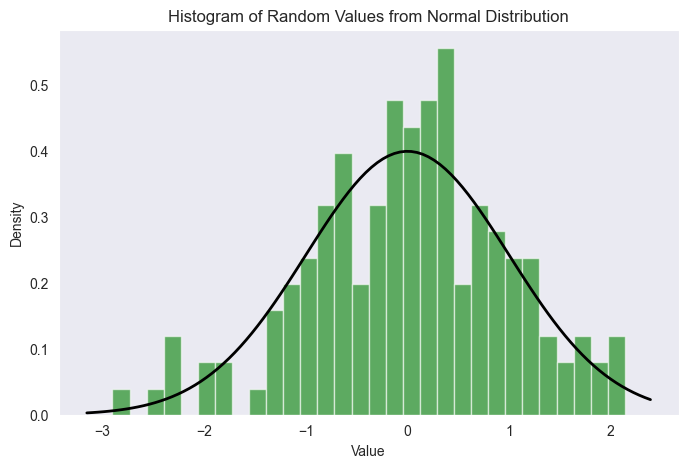

In [292]:
# Plot Normal Distributed Random Noise: Each Value Index Wise #
###############################################################

normally_distributed_random_noise = tf.random.normal(shape=[x.shape[0]])
sns.set_style("dark")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
plt.plot(normally_distributed_random_noise)
plt.title('Normal Distributed Random Noise As per Each Actual Value Index')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# Plot Normal Distributed Random Noise: Values Distribution Whether Maintaining Bell Curve #
############################################################################################

# Convert to numpy array for plotting
random_values_np = normally_distributed_random_noise.numpy()

# Plot the histogram of the random values
sns.set_style("dark")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
plt.hist(random_values_np, bins=30, density=True, alpha=0.6, color='g')

# Plot the probability density function (PDF) of a standard normal distribution for comparison
xmin, xmax = plt.xlim()
x_ = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_, 0, 1)
plt.plot(x_, p, 'k', linewidth=2)
plt.title('Histogram of Random Values from Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

Observation
- Most of the time the middle values i.e., -1 --> 1 are given from tf.random.normal, to maintain bell curve.
- But this behaviour wont visible directly as sequential as per values indexes. When we make noise density/frequency based plot, then it would be visible.

In [293]:
# Cubic Function
def f(x):
    # More cubic term affect due to 1.5 i.e.,,  
    y = (1.5 * x**3) + (0.5 * x**2) + (-4 * x) + 0.05
    return y

y = f(x) + tf.random.normal(shape=[x.shape[0]])
y

<tf.Tensor: shape=(150,), dtype=float32, numpy=
array([-1.8803672 , -0.8379773 , -1.483396  , -0.82802033, -0.831029  ,
       -0.8859196 , -0.6750235 , -0.22523394, -0.5317545 ,  1.362793  ,
       -1.2323983 ,  0.01400262,  0.07322848,  2.359967  ,  1.5398091 ,
        1.3992205 ,  3.3222375 ,  1.1203942 ,  3.0119083 ,  0.7687303 ,
        2.1238956 ,  1.588137  ,  2.3338978 ,  2.514724  ,  2.6598141 ,
        3.238599  ,  3.0655184 ,  3.5163264 ,  1.9484187 ,  3.8530173 ,
        2.2194014 ,  3.8873224 ,  3.4299347 ,  4.1431465 ,  3.163864  ,
        2.7485006 ,  4.5813484 ,  1.8923894 ,  1.7333351 ,  4.9497123 ,
        4.6812096 ,  2.342714  ,  2.736822  ,  2.9920747 ,  3.2931104 ,
        2.7998958 ,  1.9990844 ,  2.571409  ,  0.39318824,  1.857519  ,
        4.03646   ,  3.4993067 ,  2.3386378 ,  2.7010257 ,  1.1035724 ,
        0.77324533,  1.9249084 ,  1.860555  ,  0.74629056,  1.6679043 ,
        2.2766893 ,  0.5476727 ,  1.1116718 ,  4.3358335 ,  1.1720914 ,
        1.698631

<!--  -->

### EDA Plot

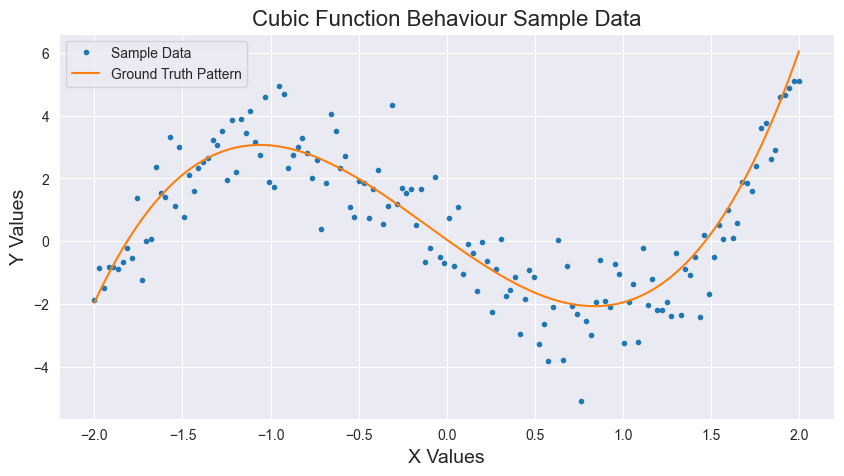

In [294]:
sns.set_style("dark")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.plot(x, y.numpy(), '.', label='Sample Data')
plt.plot(x, f(x), label='Ground Truth Pattern')
plt.title('Cubic Function Behaviour Sample Data', fontsize=16)
plt.xlabel('X Values', fontsize=14)
plt.ylabel('Y Values', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

<!--  -->

### Cubic Model
Note: As sample data resembles to the cubic data distribution with degree 3, where having two direction changes  

In [363]:
class Model(tf.Module):

    def __init__(self):
        # Randomly generate weights
        # Note: The tf.random.uniform function generates random values from a uniform distribution within a specified range.
        # A uniform distribution is a probability distribution where all outcomes are equally likely within a specified range.
        rand_init_weights = tf.random.uniform(shape=[4], minval=0.0, maxval=0.5, seed=11)
        # Initialize weights
        self.weight_c = tf.Variable(rand_init_weights[0])
        self.weight_q = tf.Variable(rand_init_weights[1])
        self.weight_l = tf.Variable(rand_init_weights[2])
        self.bias = tf.Variable(rand_init_weights[3])

    @tf.function
    def __call__(self, x):
        # When called with an input x, it computes and returns the value of a cubic polynomial:
        # Quadratic Model : cubic_weight * x^2 + quadratic_weight * x^2 + linear_weight * x + bias
        return (self.weight_c * x**3) + (self.weight_q * x**2) + (self.weight_l * x) + self.bias 

In [354]:
# Intialise Model
model = Model()

In [355]:
print(f"Initial Random Cubic Term Weight: {model.weight_c}")
print(f"Initial Random Quadratic Term Weight: {model.weight_q}")
print(f"Initial Random Linear Term Weight: {model.weight_l}")
print(f"Initial Random bias Term Weight: {model.bias}")

model.variables

Initial Random Cubic Term Weight: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.23892182>
Initial Random Quadratic Term Weight: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.23529476>
Initial Random Linear Term Weight: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.29896265>
Initial Random bias Term Weight: <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.21633816>


(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.21633816>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.23892182>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.29896265>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.23529476>)

- Predictions With Initial Random Weights

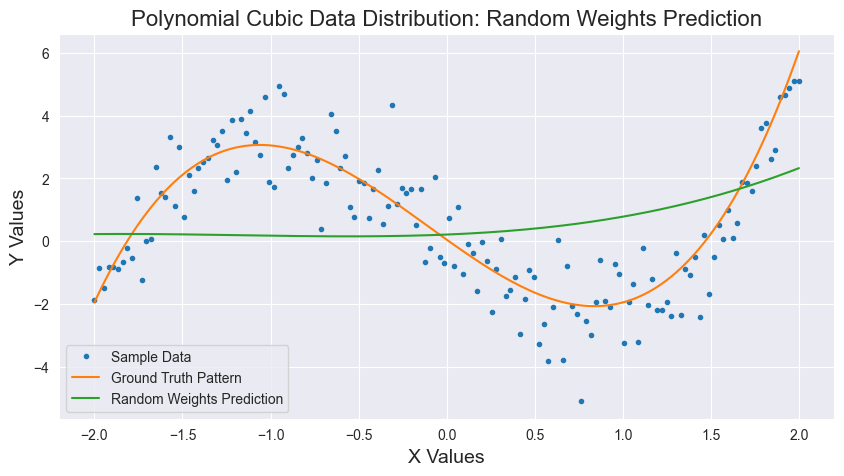

In [343]:
def plot_preds(x, y, f, model, title, pred_type):
    sns.set_style("dark")
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
    plt.plot(x, y.numpy(), '.', label='Sample Data')
    plt.plot(x, f(x), label='Ground Truth Pattern')
    plt.plot(x, model(x), label=pred_type)
    plt.title(title, fontsize=16)
    plt.xlabel('X Values', fontsize=14)
    plt.ylabel('Y Values', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()    

plot_preds(x, y, f, model, "Polynomial Cubic Data Distribution: Random Weights Prediction", 'Random Weights Prediction')    

<!--  -->

**Loss/Cost Function**

In [344]:
def mse(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

<!--  -->

**Hyperparameters**

In [359]:
epochs = 300
learning_rate = 0.01
losses = []

<!--  -->

### Gradient Descent

In [360]:
# Training Loop
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = model(x)
        loss = mse(y, y_pred)
    grads = tape.gradient(loss, model.variables) # find gradients of loss w.r.t weights and bias i.e., partial differentiation
    # Update weights & bias using gradient descent i.e., Gradient Descent Weights Update Function
    # tf.assign_sub(var, value) subtracts the value from the variable and assigns the result back to the variable. It is equivalent to var -= value.
    # It is more efficient than using tf.subtract(var, value) followed by tf.assign(var, result) because it avoids creating a new tensor. 
    
    # Update weights and bias
    # zip(*grads) unpacks the gradients list into a list of tuples, where each tuple contains the gradient for a specific weight and bias.
    # zip(*grads) is equivalent to zip(grads[0], grads[1], grads[2], grads[3])
    # g, v are unpacked tuples. g is a gradient and v is a weight or bias variable.
    # model.variables is a list of all trainable variables in the model.
    for g,v in zip(grads, model.variables):
        v.assign_sub(learning_rate * g)
    # Loss per Epoch
    loss = mse(y, model(x))
    losses.append(loss)
    if epoch % 25 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.numpy():.4f}")
        print("     >> ", model.variables)

Epoch: 0, Loss: 1.4828
     >>  (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.055030968>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.94704497>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-2.5538063>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.3979379>)
Epoch: 25, Loss: 1.3743
     >>  (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.04904278>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0017743>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-2.7090473>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.4007156>)
Epoch: 50, Loss: 1.2850
     >>  (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.04407745>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0514681>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-2.8500047>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.40301874>)
Epoch: 75, Loss: 1.2113
     >>  (<tf.Variable 'Variable:0' shape=() dtype

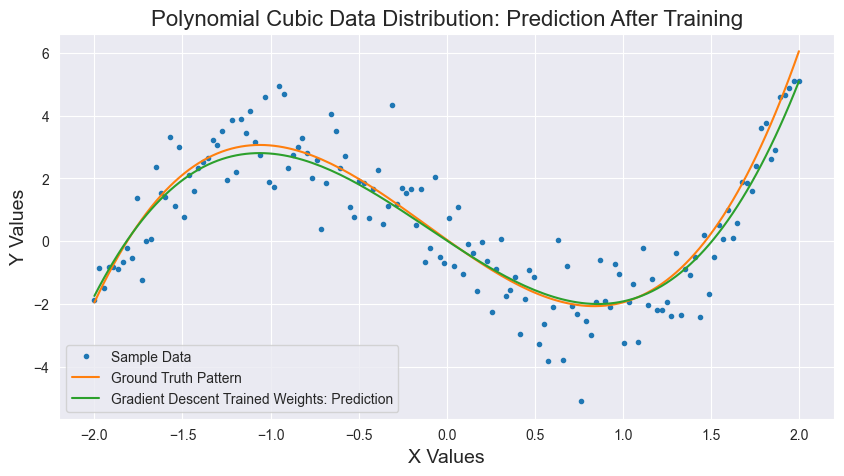

In [362]:
plot_preds(x, y, f, model, "Polynomial Cubic Data Distribution: Prediction After Training", 'Gradient Descent Trained Weights: Prediction')    

### Observations

- In this sample data, the pattern as two direction changes that resembles with the polynormial cubic regresison [degree=3] distribution.
- Hence, estimated weights for terms i.e., cubic, quadratic, linear and bias. Trained weights & bias seems to follow the data pattern more accurately, as sample data follows assumption (i.e., two direction changes) of cubic model.